#

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# The data is cleansed to ensure that the fields are the same in English
df_douban = pd.read_csv("data/douban_top250.csv",encoding='gbk')
df_imdb = pd.read_csv("data/imdb_top_250_movies.csv",encoding='gbk')

Douban average rating: 8.94
IMDb average rating: 8.31

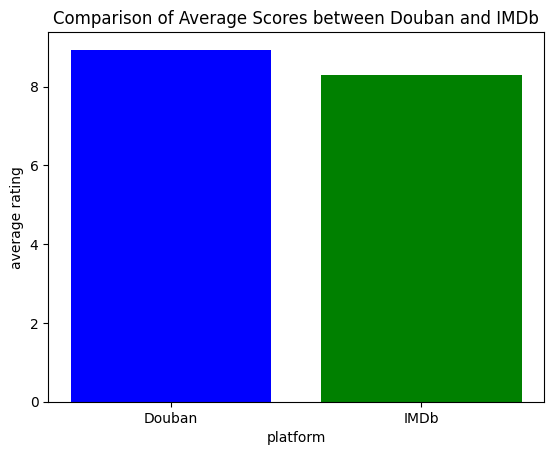

In [13]:
average_rating_douban = df_douban['rating'].mean()
average_rating_imdb = df_imdb['rating'].mean()

print(f"Douban average rating: {average_rating_douban:.2f}")
print(f"IMDb average rating: {average_rating_imdb:.2f}")

plt.bar(['Douban', 'IMDb'], [average_rating_douban, average_rating_imdb], color=['blue', 'green'])
plt.xlabel('platform')
plt.ylabel('average rating')
plt.title('Comparison of Average Scores between Douban and IMDb')
plt.show()

The number of overlapping movies: 77

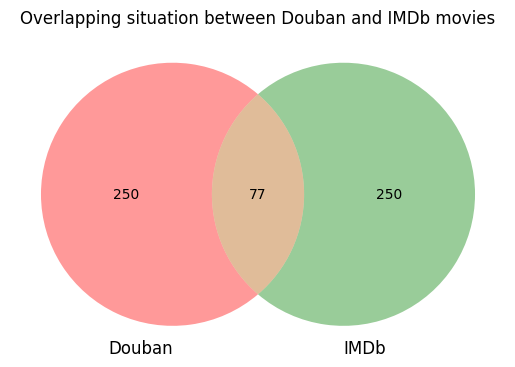

In [14]:
overlap_movies = pd.merge(df_douban, df_imdb, on='title', how='inner')
print("The number of overlapping movies:", len(overlap_movies))

venn2(subsets=(len(df_douban), len(df_imdb), len(overlap_movies)), set_labels=('Douban', 'IMDb'))
plt.title('Overlapping situation between Douban and IMDb movies')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1164\2625814123.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='origin')

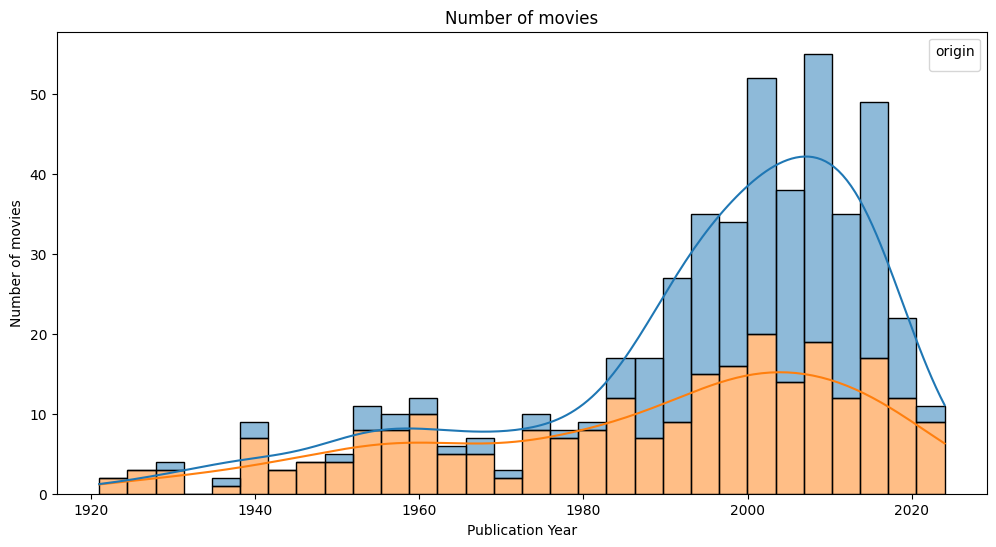

In [8]:

combined_df = pd.concat([df_douban, df_imdb], keys=['Douban', 'IMDb']).reset_index(level=0).rename(columns={'level_0': 'Source'})

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='Year', hue='Source', bins=30, kde=True, multiple="stack")
plt.xlabel('Publication Year')
plt.ylabel('Number of movies')
plt.title('Number of movies')
plt.legend(title='origin')
plt.show()

In [ ]:
#The director and style cannot be crawled at the moment because of the HTML structure